In [3]:

#first importing necessary libraries
import tarfile
import urllib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import plotting
from scipy import stats
from sklearn import base
from sklearn import compose, impute, pipeline, preprocessing
from sklearn import linear_model, tree, ensemble, svm
from sklearn import metrics, model_selection
from sklearn.externals import joblib


In [141]:
#reading file and storing in neom_data
neom_data = pd.read_csv("/Users/hiba/Downloads/neom_data.csv")


In [142]:
#visualization of data
neom_data.head()


,Dateform,mslp(hPa),t2(C),td2(C),wind_speed(m/s),wind_dir(Deg),rh(%),GHI,SWDIR(W/m2),SWDNI(W/m2),SWDIF(W/m2),rain(mm),AOD
0,01/01/2008 0:00,1012.751,14.887,2.606,2.669,105.078,43.686,0.0,0.0,0.0,0.0,0.0,0.098
1,01/01/2008 1:00,1012.917,14.429,3.363,2.667,106.699,47.442,0.0,0.0,0.0,0.0,0.0,0.098
2,01/01/2008 2:00,1012.966,14.580,3.778,3.341,112.426,48.357,0.0,0.0,0.0,0.0,0.0,0.098
3,01/01/2008 3:00,1013.247,14.390,3.507,3.141,102.371,48.125,0.0,0.0,0.0,0.0,0.0,0.098
4,01/01/2008 4:00,1013.083,14.388,3.869,3.607,111.300,49.295,0.0,0.0,0.0,0.0,0.0,0.098


In [143]:
#visualization of data
neom_data.tail()

,Dateform,mslp(hPa),t2(C),td2(C),wind_speed(m/s),wind_dir(Deg),rh(%),GHI,SWDIR(W/m2),SWDNI(W/m2),SWDIF(W/m2),rain(mm),AOD
96427,31/12/2018 19:00,1019.779,14.653,4.380,3.587,25.919,50.340,0.0,0.0,0.0,0.0,0.0,0.098
96428,31/12/2018 20:00,1019.578,13.965,2.853,2.836,35.203,47.381,0.0,0.0,0.0,0.0,0.0,0.098
96429,31/12/2018 21:00,1019.172,13.624,1.923,1.922,85.974,45.275,0.0,0.0,0.0,0.0,0.0,0.098
96430,31/12/2018 22:00,1018.610,13.918,1.512,2.512,103.656,43.211,0.0,0.0,0.0,0.0,0.0,0.098
96431,31/12/2018 23:00,1018.611,13.442,0.733,3.146,91.084,41.836,0.0,0.0,0.0,0.0,0.0,0.098


In [144]:
#visualization of data
neom_data.describe()

,mslp(hPa),t2(C),td2(C),wind_speed(m/s),wind_dir(Deg),rh(%),GHI,SWDIR(W/m2),SWDNI(W/m2),SWDIF(W/m2),rain(mm),AOD
count,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,1010.110794,24.896298,11.045605,3.991582,164.200525,46.168410,274.757261,211.082623,331.746291,63.674490,0.009041,0.098086
std,5.613583,6.382410,7.153472,2.485326,102.793404,17.874776,355.287896,296.287340,390.765915,91.856426,0.173081,0.000805
min,996.378000,4.571000,-22.946000,0.076000,0.672000,5.708000,0.000000,0.000000,0.000000,0.000000,-0.037000,0.096000
25%,1005.539750,20.221000,5.889750,2.152000,62.935500,32.173000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098000
50%,1010.050000,25.421000,11.324500,3.437000,149.692000,44.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098000
75%,1014.316000,29.466000,16.581250,5.342000,265.977750,58.859000,579.205250,429.275500,788.745750,121.765250,0.000000,0.099000
max,1029.022000,44.186000,27.196000,16.716000,359.620000,99.929000,1103.190000,954.562000,989.816000,856.685000,14.038000,0.100000


In [145]:
#data parameters and labels
neom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 13 columns):
Dateform           96432 non-null object
mslp(hPa)          96432 non-null float64
t2(C)              96432 non-null float64
td2(C)             96432 non-null float64
wind_speed(m/s)    96432 non-null float64
wind_dir(Deg)      96432 non-null float64
rh(%)              96432 non-null float64
GHI                96432 non-null float64
SWDIR(W/m2)        96432 non-null float64
SWDNI(W/m2)        96432 non-null float64
SWDIF(W/m2)        96432 non-null float64
rain(mm)           96432 non-null float64
AOD                96432 non-null float64
dtypes: float64(12), object(1)
memory usage: 9.6+ MB


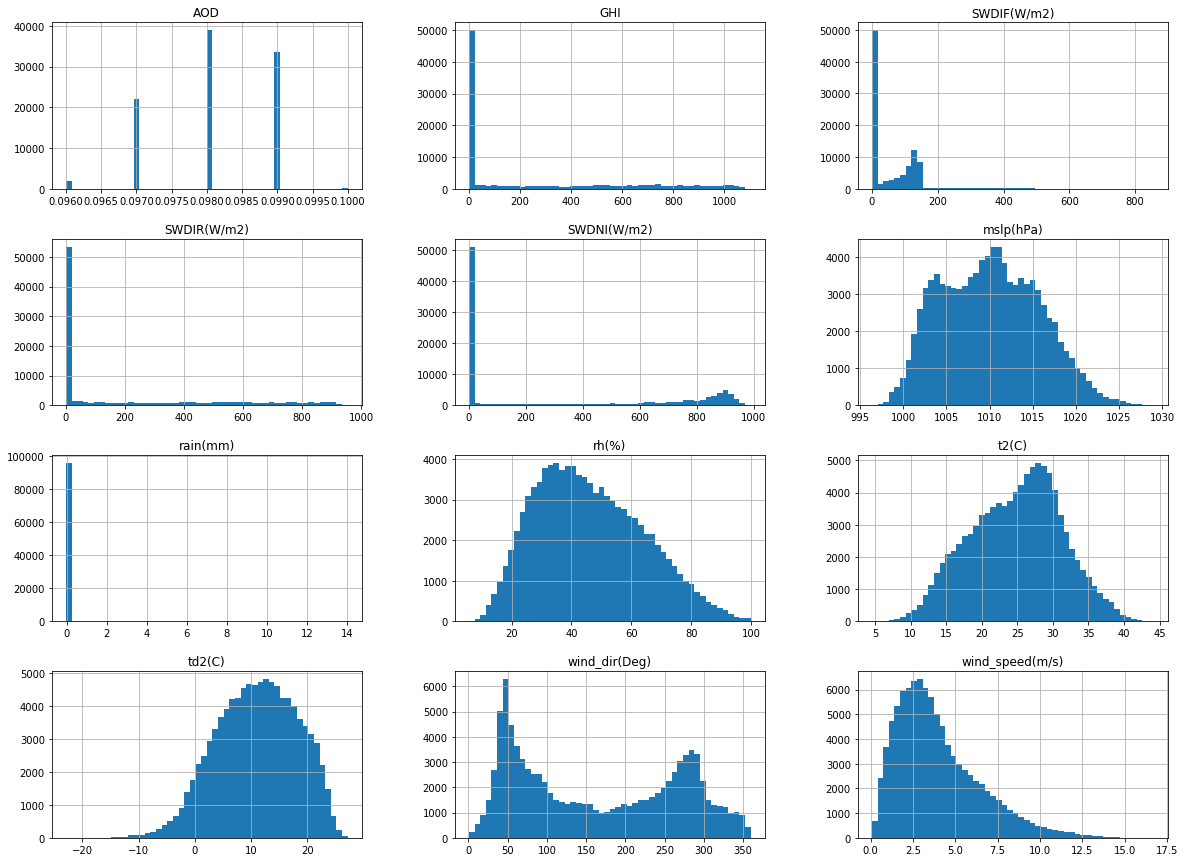

In [146]:
#graphical visualization
_ = neom_data.hist(bins=50, figsize=(20, 15))

In [650]:
#splitting the date and time component and further splitting date into day month year, and time into integer hour
neom_data['Dateform']= pd.to_datetime(neom_data['Dateform'])
neom_data['month'] = [d.date().month for d in neom_data['Dateform']]
neom_data['year'] = [d.date().year for d in neom_data['Dateform']]
neom_data['day'] = [d.date().day for d in neom_data['Dateform']]
neom_data['new_time'] = [d.time().hour for d in neom_data['Dateform']]
neom_data.head()


,Dateform,mslp(hPa),t2(C),td2(C),wind_speed(m/s),wind_dir(Deg),rh(%),GHI,SWDIR(W/m2),SWDNI(W/m2),SWDIF(W/m2),rain(mm),AOD,month,year,day,new_time
0,2008-01-01 00:00:00,1012.751,14.887,2.606,2.669,105.078,43.686,0.0,0.0,0.0,0.0,0.0,0.098,1,2008,1,0
1,2008-01-01 01:00:00,1012.917,14.429,3.363,2.667,106.699,47.442,0.0,0.0,0.0,0.0,0.0,0.098,1,2008,1,1
2,2008-01-01 02:00:00,1012.966,14.580,3.778,3.341,112.426,48.357,0.0,0.0,0.0,0.0,0.0,0.098,1,2008,1,2
3,2008-01-01 03:00:00,1013.247,14.390,3.507,3.141,102.371,48.125,0.0,0.0,0.0,0.0,0.0,0.098,1,2008,1,3
4,2008-01-01 04:00:00,1013.083,14.388,3.869,3.607,111.300,49.295,0.0,0.0,0.0,0.0,0.0,0.098,1,2008,1,4


In [649]:
#getting rid of trivial zero elements and simultanously solving for the bias and skewed problems we may face
neom_data_nozero=neom_data[neom_data.GHI!=0]
neom_data_nozero.head()

,Dateform,mslp(hPa),t2(C),td2(C),wind_speed(m/s),wind_dir(Deg),rh(%),GHI,SWDIR(W/m2),SWDNI(W/m2),SWDIF(W/m2),rain(mm),AOD,month,year,day,new_time
5,2008-01-01 05:00:00,1012.580,14.838,4.055,3.415,107.178,48.525,35.065,0.077,1.121,34.988,0.0,0.098,1,2008,1,5
6,2008-01-01 06:00:00,1012.464,17.561,4.745,2.687,111.269,42.722,172.900,2.694,10.339,170.207,0.0,0.098,1,2008,1,6
7,2008-01-01 07:00:00,1012.876,20.277,5.859,2.120,156.114,39.141,333.671,24.681,58.441,308.991,0.0,0.098,1,2008,1,7
8,2008-01-01 08:00:00,1013.202,21.085,6.633,2.883,184.119,39.532,506.559,136.189,250.818,370.369,0.0,0.098,1,2008,1,8
9,2008-01-01 09:00:00,1013.309,21.149,7.122,3.052,194.497,40.547,598.190,197.980,322.275,400.222,0.0,0.098,1,2008,1,9


In [651]:
#choosing only the elements that differ from GLOBAL HORIZANTAL IRRADIANCE
X1 = neom_data_nozero.iloc[:, [1,2,3,6,11,12,13,14,15,16]]
y1 = neom_data_nozero["GHI"]
X1.head()

,mslp(hPa),t2(C),td2(C),rh(%),rain(mm),AOD,month,year,day,new_time
5,1012.580,14.838,4.055,48.525,0.0,0.098,1,2008,1,5
6,1012.464,17.561,4.745,42.722,0.0,0.098,1,2008,1,6
7,1012.876,20.277,5.859,39.141,0.0,0.098,1,2008,1,7
8,1013.202,21.085,6.633,39.532,0.0,0.098,1,2008,1,8
9,1013.309,21.149,7.122,40.547,0.0,0.098,1,2008,1,9


/Users/hiba/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


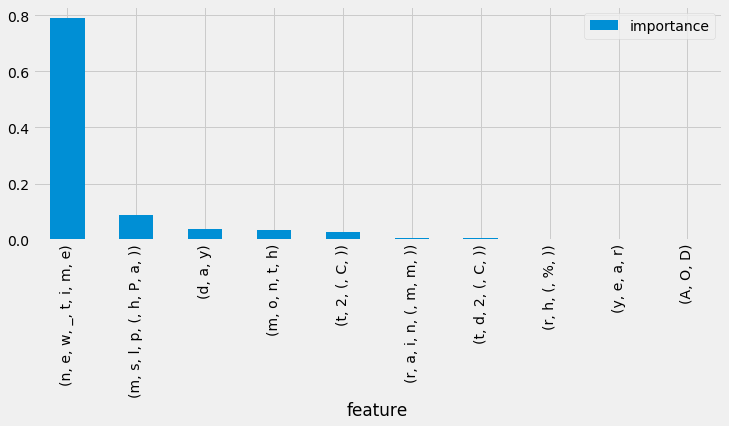

In [652]:
#Feature Selection 1

from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor();
# fit random forest classifier on the training set
rfc.fit(X1, y1);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X1,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [640]:
#Feature Selection 2

neom_data_nozero.corr()[['GHI']].sort_values('GHI')

#Features are date (day,month, year,time, temp, and AOD) depending on both feature selection properties

,GHI
rh(%),-0.204050
mslp(hPa),-0.148330
month,-0.042119
rain(mm),-0.039982
day,-0.005768
year,-0.003808
new_time,0.014761
td2(C),0.070683
AOD,0.130308
wind_speed(m/s),0.222619


In [653]:
#creating a new variable
neom_data_clean= neom_data_nozero
neom_data_clean.head()

,Dateform,mslp(hPa),t2(C),td2(C),wind_speed(m/s),wind_dir(Deg),rh(%),GHI,SWDIR(W/m2),SWDNI(W/m2),SWDIF(W/m2),rain(mm),AOD,month,year,day,new_time
5,2008-01-01 05:00:00,1012.580,14.838,4.055,3.415,107.178,48.525,35.065,0.077,1.121,34.988,0.0,0.098,1,2008,1,5
6,2008-01-01 06:00:00,1012.464,17.561,4.745,2.687,111.269,42.722,172.900,2.694,10.339,170.207,0.0,0.098,1,2008,1,6
7,2008-01-01 07:00:00,1012.876,20.277,5.859,2.120,156.114,39.141,333.671,24.681,58.441,308.991,0.0,0.098,1,2008,1,7
8,2008-01-01 08:00:00,1013.202,21.085,6.633,2.883,184.119,39.532,506.559,136.189,250.818,370.369,0.0,0.098,1,2008,1,8
9,2008-01-01 09:00:00,1013.309,21.149,7.122,3.052,194.497,40.547,598.190,197.980,322.275,400.222,0.0,0.098,1,2008,1,9


In [654]:
#deleting the extra column

del neom_data_clean['Dateform']
neom_data_clean.head()

,mslp(hPa),t2(C),td2(C),wind_speed(m/s),wind_dir(Deg),rh(%),GHI,SWDIR(W/m2),SWDNI(W/m2),SWDIF(W/m2),rain(mm),AOD,month,year,day,new_time
5,1012.580,14.838,4.055,3.415,107.178,48.525,35.065,0.077,1.121,34.988,0.0,0.098,1,2008,1,5
6,1012.464,17.561,4.745,2.687,111.269,42.722,172.900,2.694,10.339,170.207,0.0,0.098,1,2008,1,6
7,1012.876,20.277,5.859,2.120,156.114,39.141,333.671,24.681,58.441,308.991,0.0,0.098,1,2008,1,7
8,1013.202,21.085,6.633,2.883,184.119,39.532,506.559,136.189,250.818,370.369,0.0,0.098,1,2008,1,8
9,1013.309,21.149,7.122,3.052,194.497,40.547,598.190,197.980,322.275,400.222,0.0,0.098,1,2008,1,9


In [734]:
#reshaping data
X = neom_data_nozero.iloc[:, [1,2,8,9,12,14,15]]
y = neom_data_nozero["GHI"]
X.head()


,t2(C),td2(C),SWDNI(W/m2),SWDIF(W/m2),month,day,new_time
5,14.838,4.055,1.121,34.988,1,1,5
6,17.561,4.745,10.339,170.207,1,1,6
7,20.277,5.859,58.441,308.991,1,1,7
8,21.085,6.633,250.818,370.369,1,1,8
9,21.149,7.122,322.275,400.222,1,1,9


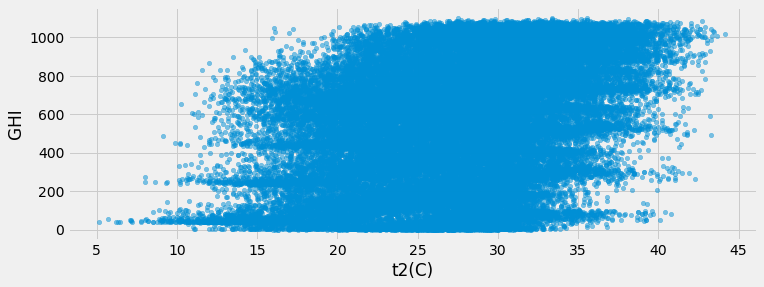

In [735]:
#linear relationship between temp and irradiance (intuitive)
neom_data_clean.plot(kind="scatter",x="t2(C)", y="GHI", alpha=0.5)

In [665]:
#more libraries 
from sklearn.datasets.california_housing import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR 
import numpy as np


In [737]:
#choosing a random seed and splitting data into training and testing
_prng = np.random.RandomState(42)


X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=_prng)


In [738]:
#visualizing the training input array
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38541 entries, 15941 to 31424
Data columns (total 7 columns):
t2(C)          38541 non-null float64
td2(C)         38541 non-null float64
SWDNI(W/m2)    38541 non-null float64
SWDIF(W/m2)    38541 non-null float64
month          38541 non-null int64
day            38541 non-null int64
new_time       38541 non-null int64
dtypes: float64(4), int64(3)
memory usage: 2.4 MB


In [739]:
#visualizing the testing input array
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9636 entries, 3220 to 89703
Data columns (total 7 columns):
t2(C)          9636 non-null float64
td2(C)         9636 non-null float64
SWDNI(W/m2)    9636 non-null float64
SWDIF(W/m2)    9636 non-null float64
month          9636 non-null int64
day            9636 non-null int64
new_time       9636 non-null int64
dtypes: float64(4), int64(3)
memory usage: 602.2 KB


In [740]:
#visualizing the training output array
y_train.describe()

count    38541.000000
mean       548.933416
std        318.963313
min          0.011000
25%        272.784000
50%        578.820000
75%        819.739000
max       1102.221000
Name: GHI, dtype: float64

In [741]:
#using linear support vector regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regr = LinearSVR(random_state=0, tol=1e-5)
regr.fit(X_train_scaled, y_train)  



/Users/hiba/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/hiba/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/hiba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=0, tol=1e-05, verbose=0)

In [742]:
print('Accuracy of linear SVR on training set: {:.2f}'.format(regr.score(X_train_scaled, y_train)))

Accuracy of linear SVR on training set: 0.84


Coefficients: 
 [ 40.17243997  10.33613269 250.45370531 142.19944066 -13.59943513
  -2.27279894  -9.4799018 ]
Variance score: -402916.2513386333


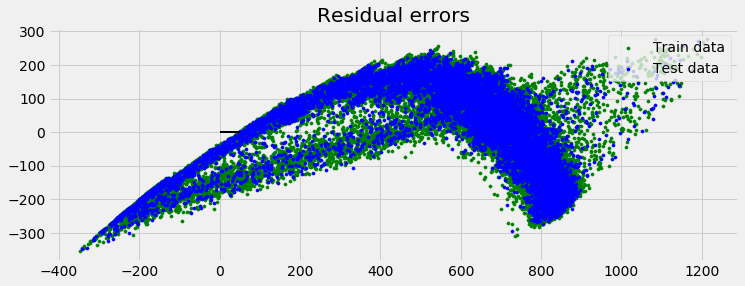

In [743]:

import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 

  
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train_scaled, y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 

# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
  
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train_scaled), reg.predict(X_train_scaled) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test_scaled), reg.predict(X_test_scaled) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

In [744]:
y_pred=reg.predict(X_test_scaled)

print(y_pred)

[114.53003089 777.19806361 723.33492371 ... 822.77874384 754.92709588
 -44.06753802]


In [745]:
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

125.00091098592719

In [826]:
#Selecting less features to estimate better turnout and lesser deviation
X_best = neom_data_nozero.iloc[:, [1,7,11]]
y_best = neom_data_nozero["GHI"]
X_best.head()

,t2(C),SWDIR(W/m2),AOD
5,14.838,0.077,0.098
6,17.561,2.694,0.098
7,20.277,24.681,0.098
8,21.085,136.189,0.098
9,21.149,197.980,0.098


In [827]:
#choosing a random seed and splitting data into training and testing
_prng = np.random.RandomState(42)


X_train,X_test,y_train,y_test=train_test_split(X_best,y_best,
                                                 test_size=0.2,
                                                 random_state=_prng)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [828]:
#Predictive modeling: linear support vector regression
regr = LinearSVR(random_state=0, tol=1e-5)
regr.fit(X_train_scaled, y_train)  

print('Accuracy of linear SVR on training set: {:.2f}'.format(regr.score(X_train_scaled, y_train)))

Accuracy of linear SVR on training set: 0.91


Coefficients: 
 [ 18.53732138 301.13194539 -19.33671008]
Variance score: 0.9163849721437587


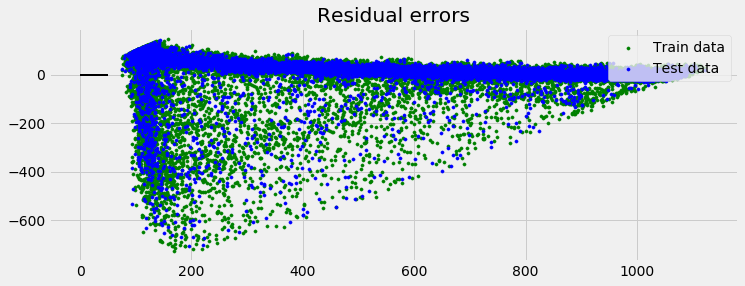

In [829]:
#SVR Linear Regression more detailed
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 

  
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train_scaled, y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 

# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test_scaled, y_test))) 
  
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train_scaled), reg.predict(X_train_scaled) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test_scaled), reg.predict(X_test_scaled) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

In [830]:
#Performance Measure Root mean square
y_pred=reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

91.25499710136431

In [882]:
#after creating the model,
#now we test using inputs ouside the realm of the dataset, these inputs are taken from front-end user
Date = input("Date: ")
dd, mm, yyyy= Date.strip().split('.')
day = dd
month = mm
year = yyyy
Temp= input("Temperature: ")
T= int(Temp)
print ("type of number ", type(Temp))
print ("type of number ", type(T))

Date: 11.11.1111
Temperature: 12
type of number  <class 'str'>
type of number  <class 'int'>


In [871]:
#testing with randomly chosen data points
X_t1= neom_data_nozero.iloc[[4],[1,7,11]]
X_t1_scaled= scaler.fit_transform(X_t1)
y_pred=reg.predict(X_t1_scaled)
print(y_pred) #predicted
y_t1=neom_data_nozero.iloc[[4],[6]]
print(y_t1) #actual number in data

[548.93341615]
      GHI
9  598.19


In [872]:
# house and registry details

House= input("House number= ")
print(House)
if House == '1':
    print ("area= 325")
    area=325
elif House == '2':
    print ("area=250")
    area=325
else:
    print('House Not Registered in Database')



House number= 1
1
area= 325


In [899]:
MaxPowerOutput=1/3*(y_pred*area)
print(MaxPowerOutput)
###""""""Most efficient solar panels: the top 5
#Here are the top five best solar panel manufacturers in 2019 
#SunPower (22.8%)
#LG (21.7%)
#REC Solar (21.7%)
#Panasonic (20.3%)
#Silfab (20.0%)#
MaxPowerPV= 0.2*MaxPowerOutput

Temp=float(Temp)
print(MaxPowerPV)
power_temp_dependent=MaxPowerPV-5*(T-25)
New_power= power_temp_dependent
print(New_power)
Avg_power_load_per_hour=New_power/3 #Power for a load of 24 hour, we have 8 hour sun and thus 16 of night 
print(Avg_power_load_per_hour)

[59467.78675004]
[11893.55735001]
[11958.55735001]
[3986.18578334]


In [897]:
#Assume max power load in the neom villa is 5kw
DiversityLoadPower=0.8*5000
print(DiversityLoadPower)

4000.0


In [901]:
#Cost is the differential between PV output and load intake
cost= 0.26 *abs(4000-3986)
cost

3.64